In [1]:
import pandas as pd
import os
from get_repo_name import get_repo_name

repo_name = get_repo_name ( os.path.basename ( os.getcwd() ) )
dataset_path = f'datasets/{repo_name}_groupedby_yearmonth.csv'
df = pd.read_csv (dataset_path)
df

,year_month,commit_count,additions,deletions,agg_loc,agg_complexity,agg_token_count,dmm_unit_size,dmm_unit_complexity,dmm_unit_interfacing
0,2014-10,9,5903,62,0.0,0.0,0.0,NaN,NaN,NaN
1,2014-11,32,2219,559,0.0,0.0,0.0,NaN,NaN,NaN
2,2014-12,5,193,85,0.0,0.0,0.0,NaN,NaN,NaN
3,2015-01,36,5510,5289,0.0,0.0,0.0,NaN,NaN,NaN
4,2015-02,33,4101,616,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
89,2022-03,429,54443,20812,483.0,110.0,3440.0,0.714286,0.714286,0.285714
90,2022-04,490,44561,31597,545.0,105.0,4352.0,0.533470,0.190789,0.293750
91,2022-05,573,45699,29223,466.0,99.0,3517.0,0.728723,0.757979,0.757979
92,2022-06,434,25626,10404,1542.0,295.0,9411.0,0.499072,0.835993,0.760297


In [2]:
df['dmm_unit_size'] = df['dmm_unit_size'].fillna(0)
df['dmm_unit_complexity'] = df['dmm_unit_complexity'].fillna(0)
df['dmm_unit_interfacing'] = df['dmm_unit_interfacing'].fillna(0)

In [3]:
start_date = df.year_month[0][5:7] + '-01-' + df.year_month[0][0:4]
end_date = df.year_month[len(df.year_month) - 1][5:7] + '-01-' + df.year_month[len(df.year_month) - 1][0:4]
dfperiod = pd.period_range(start_date, end_date, freq='M')

def new_zero_row ( year_month ):
    
    new_row = {
        'year_month': year_month,
        'commit_count': 0,
        'additions': 0,
        'deletions': 0,
        'agg_loc': 0,
        'agg_complexity': 0,
        'agg_token_count': 0,
        'dmm_unit_size': 0,
        'dmm_unit_complexity': 0,
        'dmm_unit_interfacing': 0
    }
    
    return new_row

for year_month in dfperiod:
    if df [ ( df['year_month'] == str(year_month) ) ].shape[0] == 0:
        df = df.append ( new_zero_row(year_month), ignore_index = True )

df.shape

(94, 10)

In [4]:
df['year_month'] = df['year_month'].astype(str)
df = df.sort_values ( by=['year_month'] )
df.reset_index(drop=True, inplace=True)
df

,year_month,commit_count,additions,deletions,agg_loc,agg_complexity,agg_token_count,dmm_unit_size,dmm_unit_complexity,dmm_unit_interfacing
0,2014-10,9,5903,62,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,2014-11,32,2219,559,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,2014-12,5,193,85,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,2015-01,36,5510,5289,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,2015-02,33,4101,616,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
89,2022-03,429,54443,20812,483.0,110.0,3440.0,0.714286,0.714286,0.285714
90,2022-04,490,44561,31597,545.0,105.0,4352.0,0.533470,0.190789,0.293750
91,2022-05,573,45699,29223,466.0,99.0,3517.0,0.728723,0.757979,0.757979
92,2022-06,434,25626,10404,1542.0,295.0,9411.0,0.499072,0.835993,0.760297


In [5]:
df.to_csv ( f'datasets/{repo_name}_final.csv', index = False )

# Analysis

In [6]:
for idx in range(1, 10):
    ma_prefix = 'ma_'
    df[ma_prefix + df.columns[idx]] = df[df.columns[idx]].rolling ( window = 3 ).mean()
df

,year_month,commit_count,additions,deletions,agg_loc,agg_complexity,agg_token_count,dmm_unit_size,dmm_unit_complexity,dmm_unit_interfacing,ma_commit_count,ma_additions,ma_deletions,ma_agg_loc,ma_agg_complexity,ma_agg_token_count,ma_dmm_unit_size,ma_dmm_unit_complexity,ma_dmm_unit_interfacing
0,2014-10,9,5903,62,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-11,32,2219,559,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-12,5,193,85,0.0,0.0,0.0,0.000000,0.000000,0.000000,15.333333,2771.666667,235.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2015-01,36,5510,5289,0.0,0.0,0.0,0.000000,0.000000,0.000000,24.333333,2640.666667,1977.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2015-02,33,4101,616,0.0,0.0,0.0,0.000000,0.000000,0.000000,24.666667,3268.000000,1996.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,2022-03,429,54443,20812,483.0,110.0,3440.0,0.714286,0.714286,0.285714,378.000000,36961.000000,14385.666667,536.666667,95.666667,3818.666667,0.612746,0.716458,0.314536
90,2022-04,490,44561,31597,545.0,105.0,4352.0,0.533470,0.190789,0.293750,429.000000,41505.666667,21227.000000,466.000000,92.666667,3427.000000,0.604808,0.490581,0.359821
91,2022-05,573,45699,29223,466.0,99.0,3517.0,0.728723,0.757979,0.757979,497.333333,48234.333333,27210.666667,498.000000,104.666667,3769.666667,0.658827,0.554351,0.445814
92,2022-06,434,25626,10404,1542.0,295.0,9411.0,0.499072,0.835993,0.760297,499.000000,38628.666667,23741.333333,851.000000,166.333333,5760.000000,0.587089,0.594920,0.604009


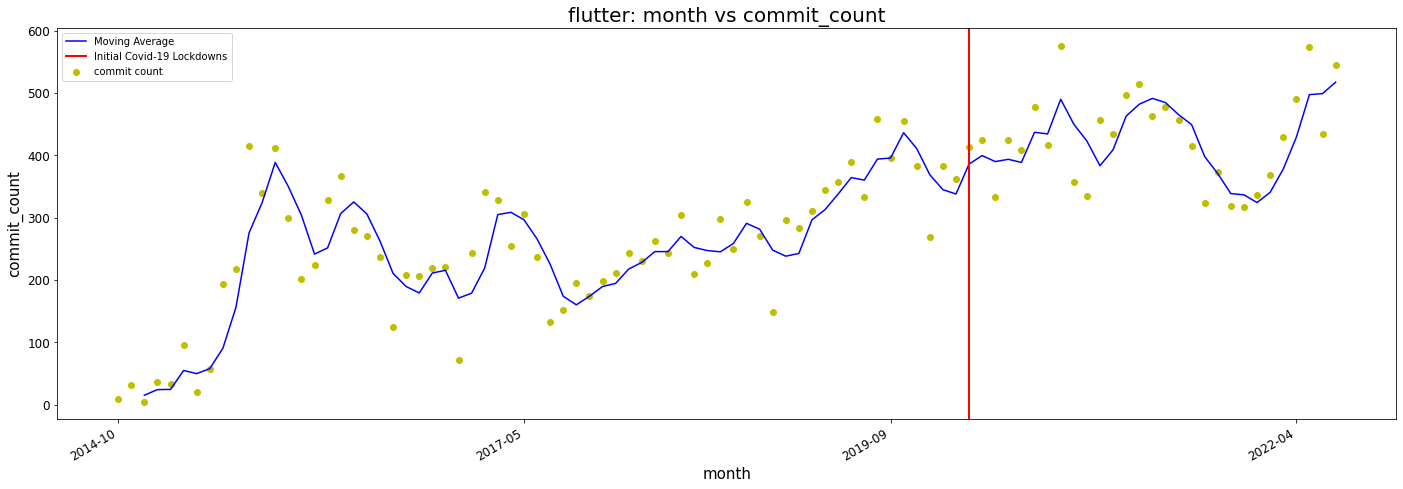

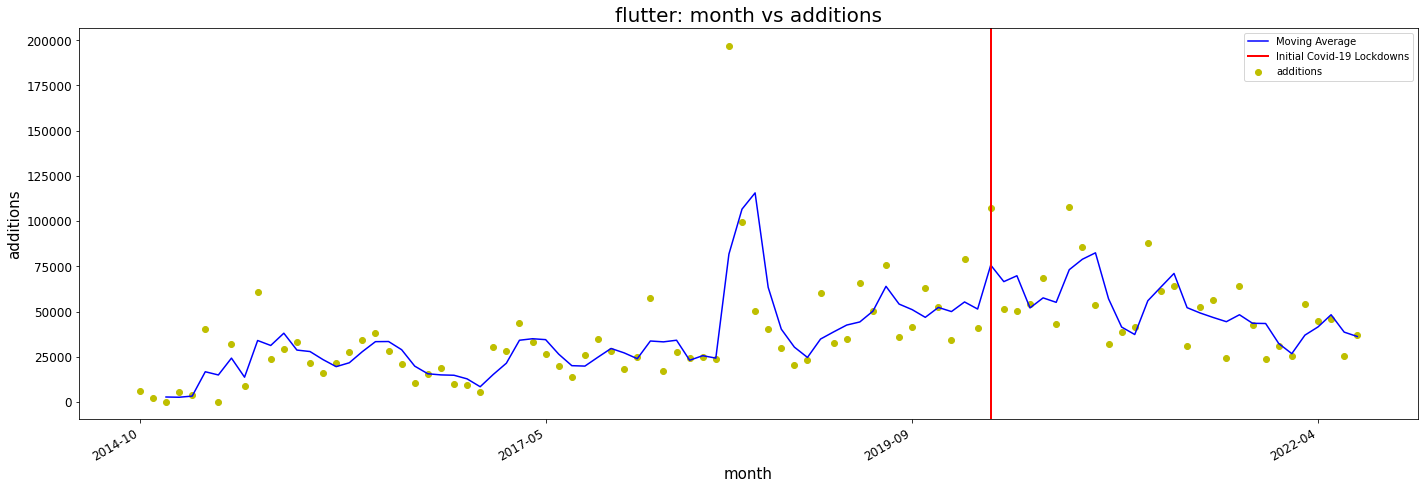

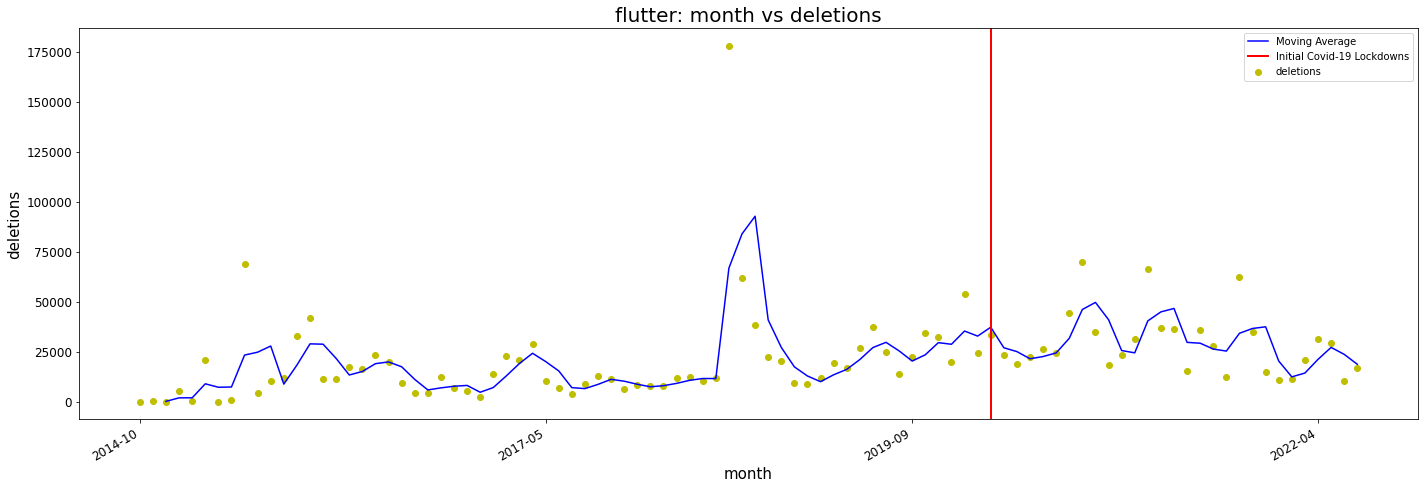

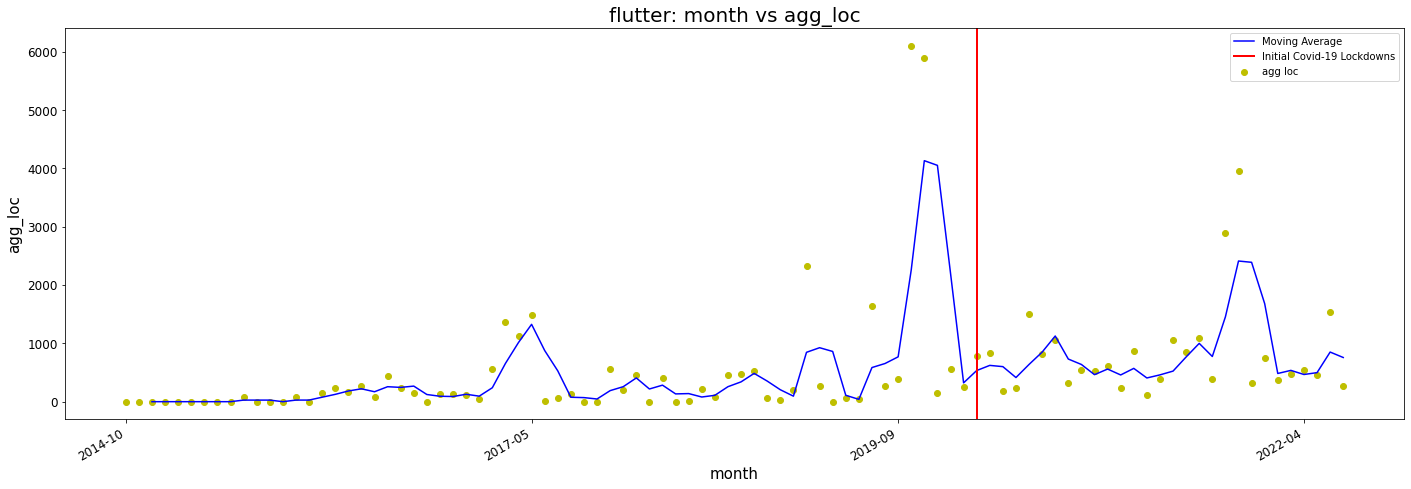

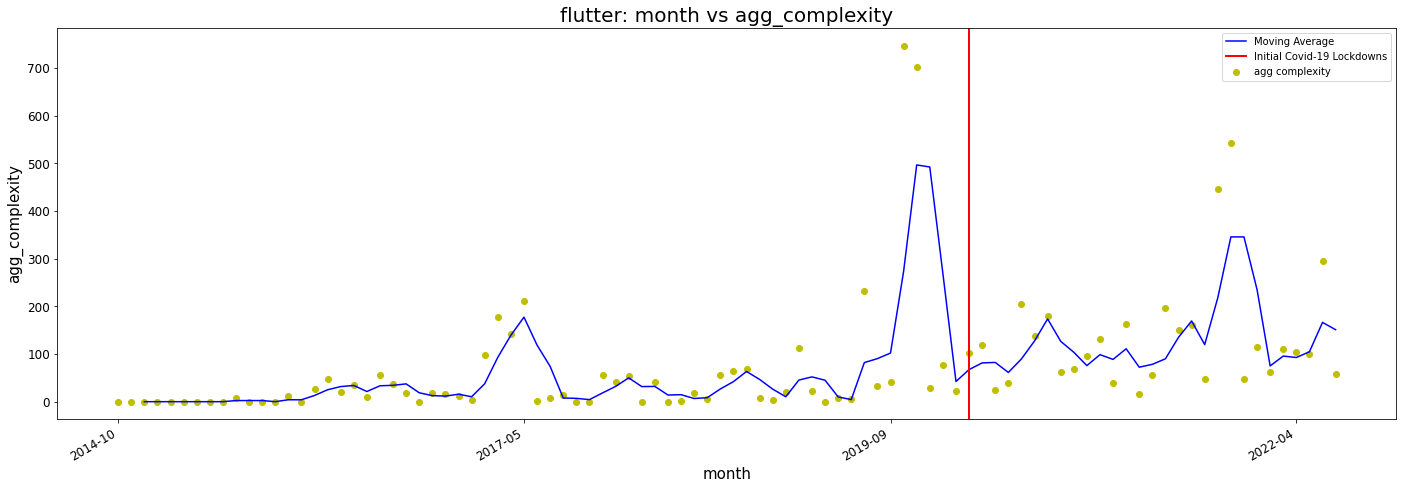

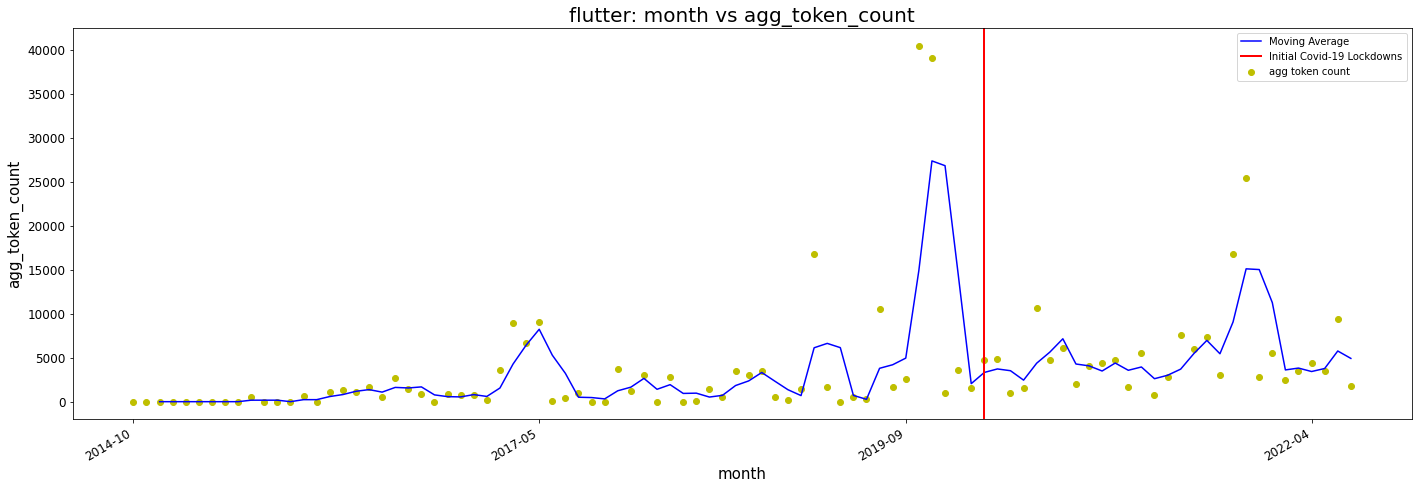

In [7]:
from plot_line_lib import plot_line

for idx in range ( 1, 7 ):
    
    images_path = f'images/'
    plot_line ( df.columns[idx], idx, df, images_path, repo_name, major_locator = True )

In [8]:
from analysis_lib import year_pre_covid_ym, pre_covid_ym, covid_ym, year_post_covid_ym

df = df.set_index(df['year_month'])

df1 = df [ year_pre_covid_ym : pre_covid_ym ]
df2 = df [ covid_ym : year_post_covid_ym ]
df1 = df1.reset_index ( drop = True )
df2 = df2.reset_index ( drop = True )

df1.shape, df2.shape

((12, 19), (12, 19))

In [9]:
from analysis_lib import calc_and_compare_means

calc_and_compare_means ( df1, df2 )

Pre and Post-Covid Mean Comparisons:
commit count :  370  vs  422  ->  Up (14.1%)
additions :  50513  vs  61162  ->  Up (21.1%)
deletions :  27264  vs  30944  ->  Up (13.5%)
agg loc :  1305  vs  637  ->  Down (51.2%)
agg complexity :  160  vs  100  ->  Down (37.5%)
agg token count :  8580  vs  4195  ->  Down (51.1%)


# Distribution

In [10]:
from analysis_lib import get_equilibrium_pc

print("Pre-pandemic equilibrium percentages:")
for idx in range ( 1, 7 ):
    print ( f'{df1.columns[idx]} = { get_equilibrium_pc ( list ( df1[df1.columns[idx]] ) ) }' )
    
print("\nPost-pandemic equilibrium percentages:")
for idx in range ( 1, 7 ):
    print ( f'{df2.columns[idx]} = { get_equilibrium_pc ( list ( df2[df2.columns[idx]] ) ) }' )

Pre-pandemic equilibrium percentages:
commit_count = 50.0
additions = 41.7
deletions = 41.7
agg_loc = 16.7
agg_complexity = 16.7
agg_token_count = 16.7

Post-pandemic equilibrium percentages:
commit_count = 50.0
additions = 33.3
deletions = 41.7
agg_loc = 33.3
agg_complexity = 33.3
agg_token_count = 33.3


In [11]:
from analysis_lib import get_pareto_pc

print("Pre-pandemic pareto percentages:")
for idx in range ( 1, 7 ):
    print ( f'{df1.columns[idx]} = { get_pareto_pc ( list ( df1[df1.columns[idx]] ) ) }' )
    
print("\nPost-pandemic pareto percentages:")
for idx in range ( 1, 7 ):
    print ( f'{df2.columns[idx]} = { get_pareto_pc ( list ( df2[df2.columns[idx]] ) ) }' )

Pre-pandemic pareto percentages:
commit_count = 80.0
additions = 75.0
deletions = 75.0
agg_loc = 25.0
agg_complexity = 25.0
agg_token_count = 25.0

Post-pandemic pareto percentages:
commit_count = 80.0
additions = 75.0
deletions = 75.0
agg_loc = 58.3
agg_complexity = 58.3
agg_token_count = 66.7
